In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
# Step 1: Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Step 2: Explore the structure of the dataset
print("Dataset structure and data types:")
print(df.info())
print("\n")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")

# Get basic statistics
print("Basic statistics of numerical columns:")
print(df.describe())
print("\n")

# Step 3: Clean the dataset
# Option 1: Fill missing values (example for numerical columns)
print("Cleaning the dataset...")

# Fill numerical columns with mean or median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    # You can use mean, median, or a specific value
    df[col] = df[col].fillna(df[col].median())
    
# Fill categorical columns with mode or a specific value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown")

# Check if cleaning was successful
print("Missing values after cleaning:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Dataset structure and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4

In [5]:
# 1. Compute basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:")
print(statistics)

# 2. Group by a categorical column (assuming 'species' exists in your dataset)
# and compute mean of numerical columns for each group
try:
    # Try with 'species' column which is common in iris dataset
    grouped_stats = df.groupby('species').mean()
    print("\nMean values grouped by species:")
    print(grouped_stats)
except KeyError:
    # If 'species' doesn't exist, try to find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        # Use the first categorical column found
        first_cat_col = categorical_cols[0]
        grouped_stats = df.groupby(first_cat_col).mean()
        print(f"\nMean values grouped by {first_cat_col}:")
        print(grouped_stats)
    else:
        print("\nNo categorical columns found for grouping.")

# 3. Identify patterns (simple correlation matrix)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    correlation = df[numerical_cols].corr()
    print("\nCorrelation matrix to identify patterns:")
    print(correlation)

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Mean values grouped by Species:
                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770    

In [6]:
# 1. Compute basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:")
print(statistics)

# 2. Group by a categorical column (assuming 'species' exists in your dataset)
# and compute mean of numerical columns for each group
try:
    # Try with 'species' column which is common in iris dataset
    grouped_stats = df.groupby('species').mean()
    print("\nMean values grouped by species:")
    print(grouped_stats)
except KeyError:
    # If 'species' doesn't exist, try to find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        # Use the first categorical column found
        first_cat_col = categorical_cols[0]
        grouped_stats = df.groupby(first_cat_col).mean()
        print(f"\nMean values grouped by {first_cat_col}:")
        print(grouped_stats)
    else:
        print("\nNo categorical columns found for grouping.")

# 3. Identify patterns (simple correlation matrix)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    correlation = df[numerical_cols].corr()
    print("\nCorrelation matrix to identify patterns:")
    print(correlation)

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Mean values grouped by Species:
                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770    

In [7]:
# 1. Compute basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:")
print(statistics)

# 2. Group by a categorical column (assuming 'species' exists in your dataset)
# and compute mean of numerical columns for each group
try:
    # Try with 'species' column which is common in iris dataset
    grouped_stats = df.groupby('species').mean()
    print("\nMean values grouped by species:")
    print(grouped_stats)
except KeyError:
    # If 'species' doesn't exist, try to find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        # Use the first categorical column found
        first_cat_col = categorical_cols[0]
        grouped_stats = df.groupby(first_cat_col).mean()
        print(f"\nMean values grouped by {first_cat_col}:")
        print(grouped_stats)
    else:
        print("\nNo categorical columns found for grouping.")

# 3. Identify patterns (simple correlation matrix)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    correlation = df[numerical_cols].corr()
    print("\nCorrelation matrix to identify patterns:")
    print(correlation)

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Mean values grouped by Species:
                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770    

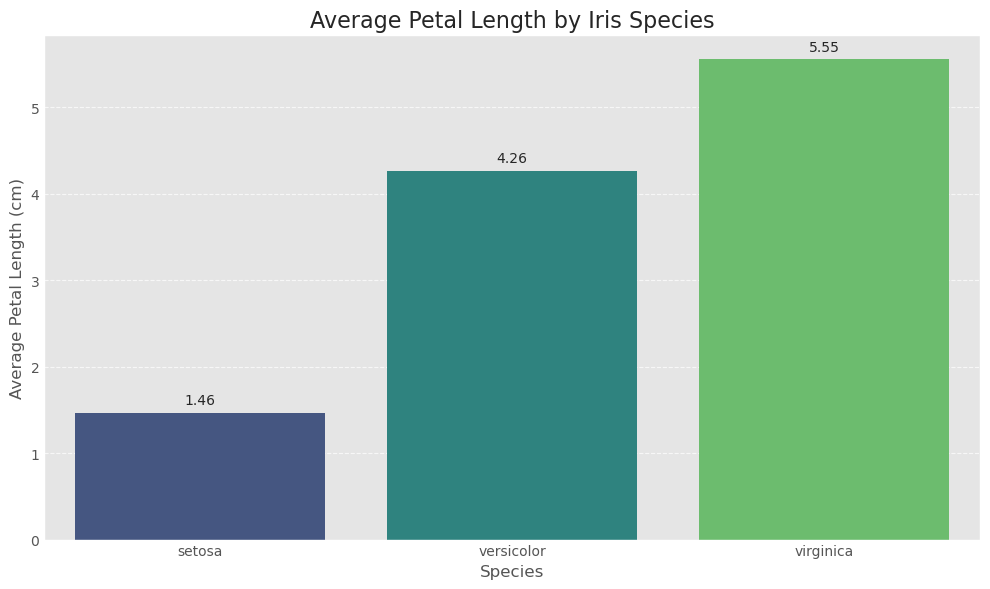

In [16]:
# Calculate the average petal length per species
avg_petal_length = df.groupby('species')['petal length (cm)'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='petal length (cm)', data=avg_petal_length, palette='viridis')

# Customize the chart
plt.title('Average Petal Length by Iris Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Petal Length (cm)', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, value in enumerate(avg_petal_length['petal length (cm)']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

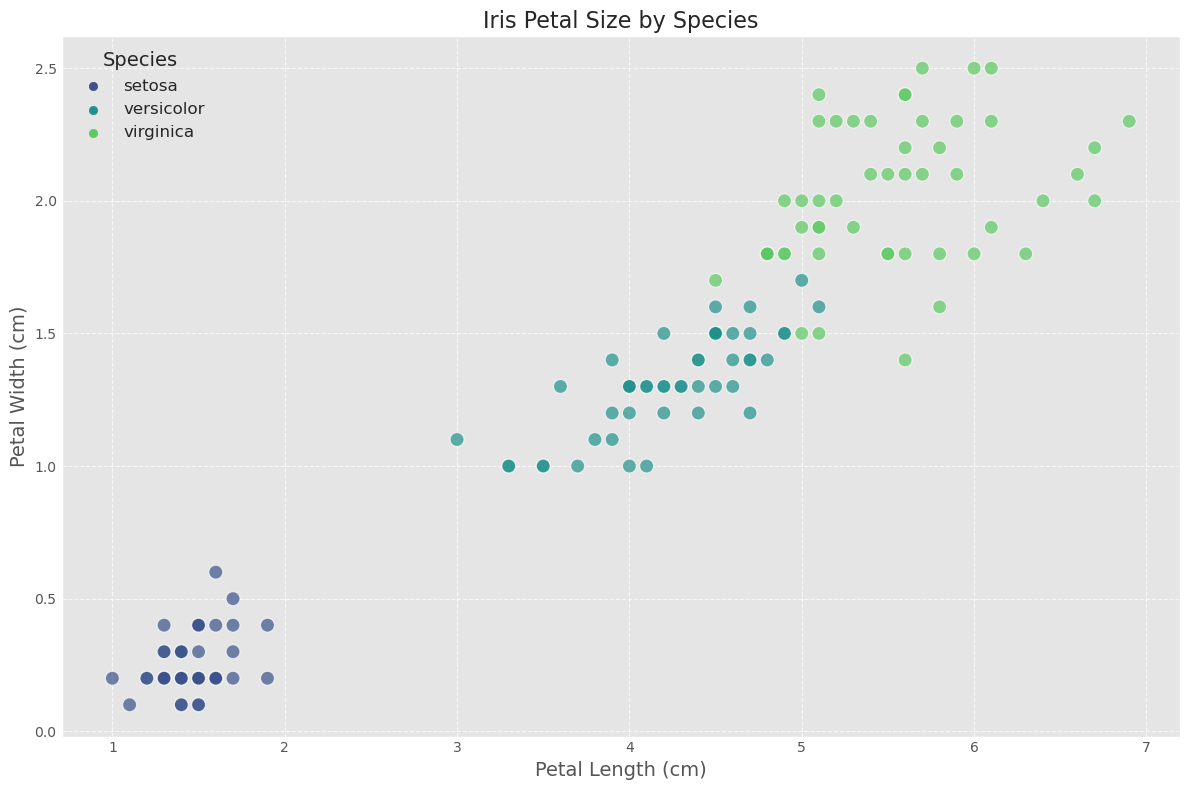

In [21]:
# Create the scatter plot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='species',
    palette='viridis',
    s=100,  # Marker size
    alpha=0.7,  # Transparency
    data=df
)

# Add title and labels
plt.title('Iris Petal Size by Species', fontsize=16)
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)

# Customize the legend
plt.legend(title='Species', fontsize=12, title_fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

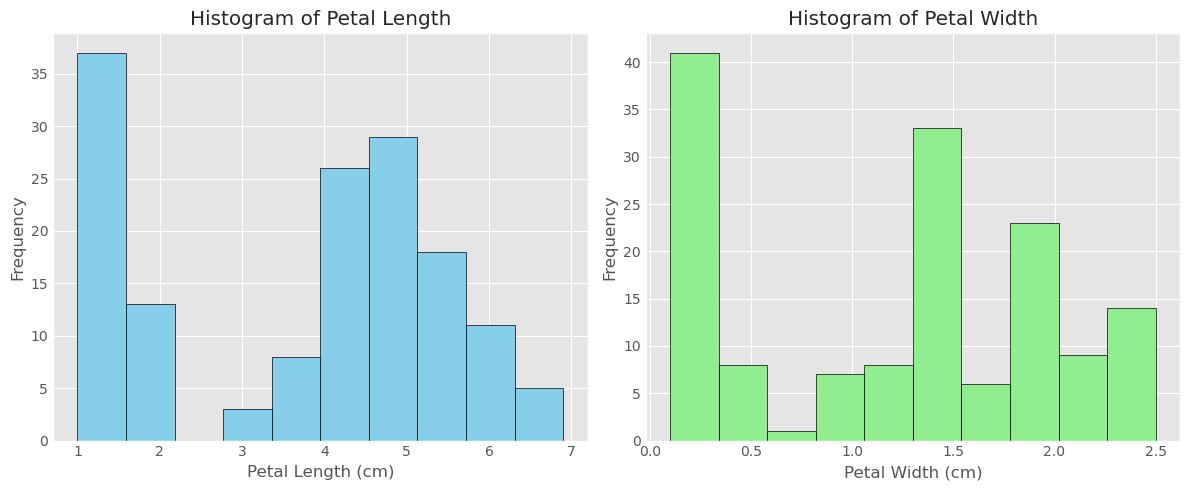

In [31]:

# Create a figure with two subplots for petal length and width
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for petal length
axes[0].hist(iris_df['petal_length'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Petal Length')
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Frequency')

# Histogram for petal width
axes[1].hist(iris_df['petal_width'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Petal Width')
axes[1].set_xlabel('Petal Width (cm)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

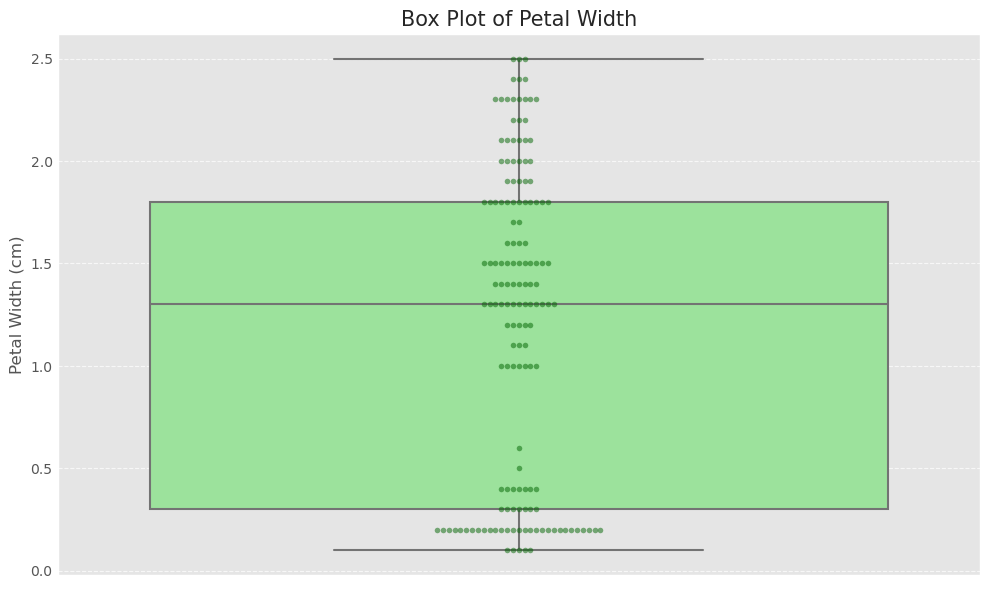

In [33]:
# Create a box plot for petal width
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(y=iris_df['petal_width'], color='lightgreen')

# Add a swarm plot to show individual data points
sns.swarmplot(y=iris_df['petal_width'], color='darkgreen', alpha=0.5, size=4)

# Add title and labels
plt.title('Box Plot of Petal Width', fontsize=15)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance the plot appearance
plt.tight_layout()
plt.show()